###### Import the lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


###### Load the dataset

In [2]:
mobile_data=pd.read_csv("/kaggle/input/mobile-prices-2023/mobile_prices_2023.csv")

###### data preprocessing

In [3]:
mobile_data.shape

(1836, 11)

In [4]:
mobile_data.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [5]:
mobile_data['Price in INR']=mobile_data['Price in INR'].str.replace('₹','')

#mobile_data['Price in INR'].astype(int)

In [6]:
# price in inr convert obj to int 
mobile_data['Price in INR']=mobile_data['Price in INR'].str.replace('₹','').str.replace(',','')
mobile_data['Price in INR']=mobile_data['Price in INR'].astype(int)

In [7]:
mobile_data['Number of Ratings']=mobile_data['Number of Ratings'].str.replace(',','')
mobile_data['Number of Ratings']=mobile_data['Number of Ratings'].astype(int)

In [8]:
mobile_data.dtypes

Phone Name            object
Rating ?/5           float64
Number of Ratings      int64
RAM                   object
ROM/Storage           object
Back/Rare Camera      object
Front Camera          object
Battery               object
Processor             object
Price in INR           int64
Date of Scraping      object
dtype: object

In [9]:
mobile_data.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [10]:
mobile_data=mobile_data.dropna()

In [11]:
mobile_data.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [12]:
mobile_data.drop_duplicates(inplace=True)

In [13]:
mobile_data.duplicated().sum()

0

In [14]:
mobile_data.shape

(1252, 11)

In [15]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1252 non-null   object 
 1   Rating ?/5         1252 non-null   float64
 2   Number of Ratings  1252 non-null   int64  
 3   RAM                1252 non-null   object 
 4   ROM/Storage        1252 non-null   object 
 5   Back/Rare Camera   1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   int64  
 10  Date of Scraping   1252 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 117.4+ KB


In [16]:
num_var=mobile_data[['Rating ?/5','Number of Ratings','Price in INR']]
num_var.head()

,Rating ?/5,Number of Ratings,Price in INR
0,4.2,33561,5649
1,4.2,77128,11999
2,4.3,15175,6999
3,4.2,22621,7749
4,4.3,15175,6999


<Axes: xlabel='Rating ?/5'>

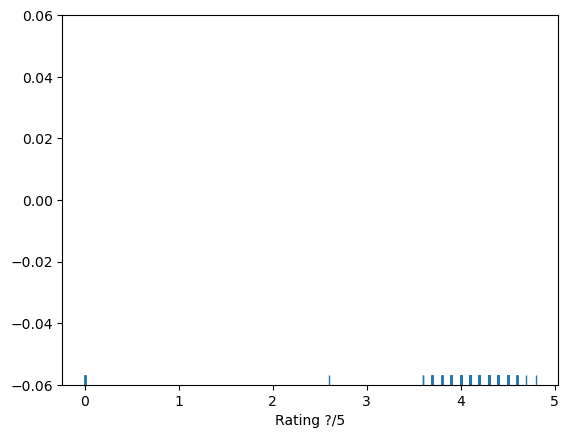

In [17]:
sns.rugplot(x='Rating ?/5', data=mobile_data)

In [18]:
mobile_data['Number of Ratings'].value_counts()

0         11
50667      8
62922      8
715        7
560071     7
          ..
567        1
4034       1
69762      1
3241       1
15701      1
Name: Number of Ratings, Length: 533, dtype: int64

In [19]:
cat_var=mobile_data[['Phone Name','RAM','ROM/Storage','Back/Rare Camera'
                    ,'Front Camera','Battery','Processor','Date of Scraping']]
cat_var.head()

,Phone Name,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,2023-06-17


<Axes: >

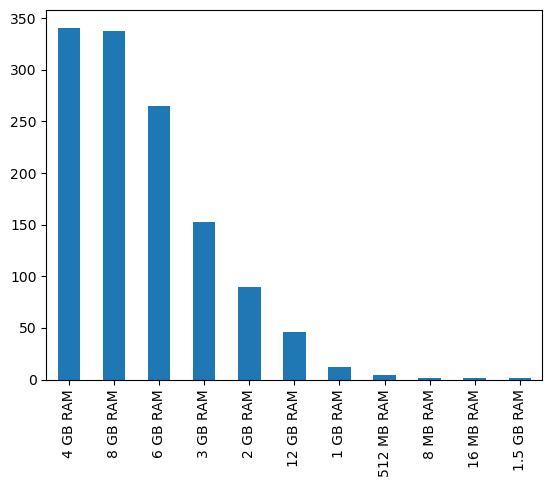

In [20]:
mobile_data['RAM'].value_counts().plot.bar()

###### label encoding 

<Axes: ylabel='ROM/Storage'>

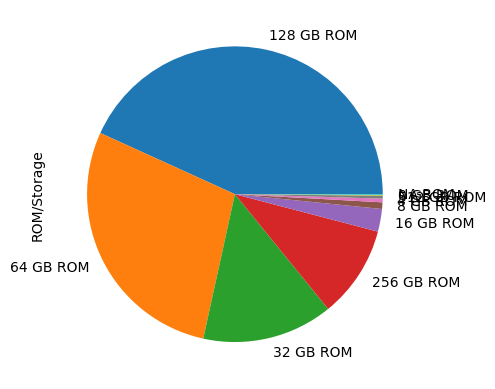

In [21]:
mobile_data['ROM/Storage'].value_counts().plot.pie()

In [22]:
label_encoder = preprocessing.LabelEncoder()
mobile_data['Phone Name']= label_encoder.fit_transform(mobile_data['Phone Name'])
mobile_data['RAM']=label_encoder.fit_transform(mobile_data['RAM'])
mobile_data['ROM/Storage']=label_encoder.fit_transform(mobile_data['ROM/Storage'])
mobile_data['Back/Rare Camera']=label_encoder.fit_transform(mobile_data['Back/Rare Camera'])
mobile_data['Front Camera']=label_encoder.fit_transform(mobile_data['Front Camera'])
mobile_data['Battery']=label_encoder.fit_transform(mobile_data['Battery'])
mobile_data['Processor']=label_encoder.fit_transform(mobile_data['Processor'])
mobile_data['Date of Scraping']=label_encoder.fit_transform(mobile_data['Date of Scraping'])

In [23]:
mobile_data.corr()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
Phone Name,1.000000,0.199221,0.014978,0.090683,-0.168096,0.100468,-0.032185,0.136347,0.041178,0.102682,NaN
Rating ?/5,0.199221,1.000000,0.130722,0.023098,0.021832,-0.037863,0.046263,0.069878,-0.016741,-0.028379,NaN
Number of Ratings,0.014978,0.130722,1.000000,-0.146807,0.198110,-0.144880,0.090804,-0.140052,0.026256,-0.208325,NaN
RAM,0.090683,0.023098,-0.146807,1.000000,-0.452715,0.078540,-0.355165,0.166633,0.051497,0.214468,NaN
ROM/Storage,-0.168096,0.021832,0.198110,-0.452715,1.000000,-0.156722,0.255119,-0.027372,0.031106,-0.279068,NaN
Back/Rare Camera,0.100468,-0.037863,-0.144880,0.078540,-0.156722,1.000000,-0.143775,0.125851,0.050568,0.025932,NaN
Front Camera,-0.032185,0.046263,0.090804,-0.355165,0.255119,-0.143775,1.000000,0.109941,-0.070613,-0.367879,NaN
Battery,0.136347,0.069878,-0.140052,0.166633,-0.027372,0.125851,0.109941,1.000000,0.066663,-0.144340,NaN
Processor,0.041178,-0.016741,0.026256,0.051497,0.031106,0.050568,-0.070613,0.066663,1.000000,0.020452,NaN
Price in INR,0.102682,-0.028379,-0.208325,0.214468,-0.279068,0.025932,-0.367879,-0.144340,0.020452,1.000000,NaN


In [24]:
# splitting the datasets

In [25]:
x=mobile_data[['Phone Name','Rating ?/5','Number of Ratings','RAM','ROM/Storage','Back/Rare Camera','Front Camera','Battery','Processor','Date of Scraping']]
y=mobile_data['Price in INR']

In [26]:
# splitting the dataset into training and testing dataset

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

In [28]:
#Import LinearRegression from sklearn.linear_model

from sklearn.linear_model import LinearRegression

In [29]:
# create an instance of a linear regression

lm=LinearRegression()
# Train/fit on the training data 

lm.fit(x_train,y_train)

LinearRegression()

In [30]:
# print out the coefficients of the model

lm.coef_

array([ 4.38474567e+00,  7.76175545e+01, -2.41081027e-02,  2.31473928e+02,
       -8.92446836e+02, -2.04233389e+01, -5.17418401e+02, -1.41067528e+02,
        3.91036555e+00,  0.00000000e+00])

In [31]:
# use lm.predict() to predict off the x_test set of the data 

predictions=lm.predict(x_test)

In [32]:
from sklearn import metrics

In [33]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   5184.853211045551
MSE :   41640080.35687229
RMAE :   6452.912548367
